In [1]:
import pandas as pd
import numpy as np

from itertools import product
import category_encoders as ce

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#!pip install xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance
import lightgbm


D:\Anaconda3\lib\site-packages\distributed\utils.py:139: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] Se ha intentado una operación de socket en un host no accesible
  RuntimeWarning,


In [4]:
sales_train_df = pd.read_csv('sales_train.csv')
test_df = pd.read_csv('test.csv')
items_df = pd.read_csv('items.csv')
shops_df = pd.read_csv('shops.csv')
categories_df = pd.read_csv('item_categories.csv')

In [5]:
#First word of shop_name coresponds to the city.
shops_df['city'] = shops_df.shop_name.str.split(expand=True)[0]
shops_df['city'] = shops_df.city.str.replace("!Якутск", "Якутск")
city_ord = ce.OrdinalEncoder()
shops_df['city_ord'] = city_ord.fit_transform(shops_df.city)
shops_df

,shop_name,shop_id,city,city_ord
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,1
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,1
2,"Адыгея ТЦ ""Мега""",2,Адыгея,2
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,3
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,4
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,5
6,"Воронеж (Плехановская, 13)",6,Воронеж,6
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,6
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,6
9,Выездная Торговля,9,Выездная,7


In [6]:
# Якутск Орджоникидзе, 56
sales_train_df.loc[sales_train_df.shop_id == 0, 'shop_id'] = 57
test_df.loc[test_df.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
sales_train_df.loc[sales_train_df.shop_id == 1, 'shop_id'] = 58
test_df.loc[test_df.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
sales_train_df.loc[sales_train_df.shop_id == 10, 'shop_id'] = 11
test_df.loc[test_df.shop_id == 10, 'shop_id'] = 11

In [7]:
shops_df.drop([0,1,10], inplace=True)
shops_df

,shop_name,shop_id,city,city_ord
2,"Адыгея ТЦ ""Мега""",2,Адыгея,2
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,3
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,4
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,5
6,"Воронеж (Плехановская, 13)",6,Воронеж,6
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,6
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,6
9,Выездная Торговля,9,Выездная,7
11,Жуковский ул. Чкалова 39м²,11,Жуковский,8
12,Интернет-магазин ЧС,12,Интернет-магазин,9


In [8]:
categories_sub = categories_df.item_category_name.str.split('-', n=1, expand=True)
categories_df[['main', 'secondary']] = categories_sub
main_ord = ce.OrdinalEncoder()
sub_ord = ce.OrdinalEncoder()
category_ord = main_ord.fit_transform(categories_df.main)
category_ord['sub'] = sub_ord.fit_transform(categories_df.secondary)
categories_df[['main_category_ord', 'subcategory_ord']] = category_ord.astype(int)

In [6]:
categories_df.head(20)

,item_category_name,item_category_id,main,secondary,main_category_ord,subcategory_ord
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники,1,1
1,Аксессуары - PS2,1,Аксессуары,PS2,2,2
2,Аксессуары - PS3,2,Аксессуары,PS3,2,3
3,Аксессуары - PS4,3,Аксессуары,PS4,2,4
4,Аксессуары - PSP,4,Аксессуары,PSP,2,5
5,Аксессуары - PSVita,5,Аксессуары,PSVita,2,6
6,Аксессуары - XBOX 360,6,Аксессуары,XBOX 360,2,7
7,Аксессуары - XBOX ONE,7,Аксессуары,XBOX ONE,2,8
8,Билеты (Цифра),8,Билеты (Цифра),None,3,-1
9,Доставка товара,9,Доставка товара,None,4,-1


In [9]:
#join items_df with categories ordinal columns
items_merged_df = items_df.merge(categories_df[['main_category_ord', 'subcategory_ord', 'item_category_id']], on='item_category_id')

In [10]:
items_merged_df.head()

,item_name,item_id,item_category_id,main_category_ord,subcategory_ord
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,12,23
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,12,23
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,12,23
3,***КОРОБКА (СТЕКЛО) D,4,40,12,23
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,12,23


In [11]:
print(sales_train_df.shape)
sales_train_df.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


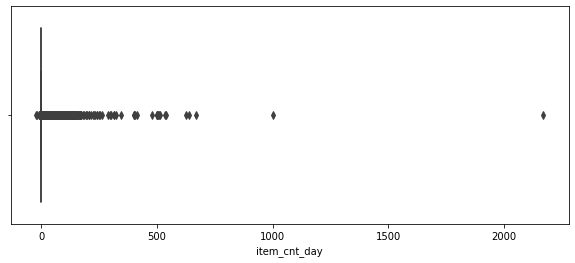

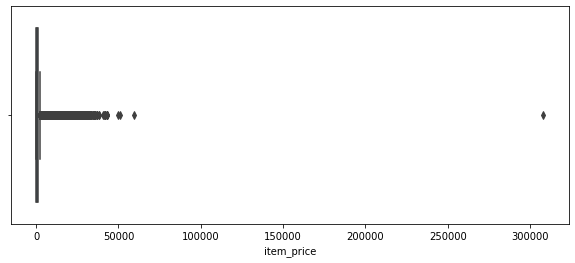

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(sales_train_df.item_cnt_day)

plt.figure(figsize=(10,4))
sns.boxplot(sales_train_df.item_price)

In [13]:
sales_train_df = sales_train_df[sales_train_df.item_price<100000]
sales_train_df = sales_train_df[sales_train_df.item_cnt_day<1000]
sales_train_df.shape

(2935846, 6)

In [14]:
sales_train_df[sales_train_df.item_price<0].item_price = sales_train_df.item_price.median()
sales_train_df[sales_train_df.item_price<0]

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [15]:
median = sales_train_df[(sales_train_df.shop_id==32)&(sales_train_df.item_id==2973)&(sales_train_df.date_block_num==4)&(sales_train_df.item_price>0)].item_price.median()
sales_train_df.loc[sales_train_df.item_price<0, 'item_price'] = median
sales_train_df[sales_train_df.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


In [16]:
# Removing duplicates from Sales train dataset
subset = ['date','date_block_num','shop_id','item_id','item_cnt_day']
sales_train_df.duplicated(subset=subset).value_counts()

False    2935822
True          24
dtype: int64

In [17]:
sales_train_df.drop_duplicates(subset=subset,inplace=True)

In [24]:
sales_train_df['revenue'] = sales_train_df.item_cnt_day*sales_train_df.item_price

In [25]:
"""matrix = []
cols = ['date_block_num','shop_id','item_id']
for i in range(34):
    sales = sales_train_df[sales_train_df.date_block_num==i]
    matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))
    
matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols,inplace=True)
matrix.date_block_num.max()"""

33

In [2]:
#matrix.to_csv("shop_items_comb_per_month.csv")
matrix=pd.read_csv("shop_items_comb_per_month.csv")
#matrix[matrix.date_block_num==0]

In [18]:
cols = ['date_block_num','shop_id','item_id']
train_grouped_df = sales_train_df.groupby(cols).item_cnt_day.sum().reset_index()
#train_grouped.item_price = train_grouped.item_price/train_grouped.item_cnt_day
train_grouped_df.rename(columns={'item_cnt_day':'item_cnt_month'}, inplace=True)
#train_grouped.reset_index(inplace=True)

matrix = pd.merge(matrix, train_grouped_df, on=cols, how='left')
matrix['item_cnt_month'] = (matrix['item_cnt_month']
                                .fillna(0)
                                .clip(0,20) # NB clip target here
                                .astype(np.float16))
#train_grouped = train_grouped.reindex(columns=['year', 'month', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day'])
matrix.head()

,Unnamed: 0,date_block_num,shop_id,item_id,item_cnt_month
0,114910,0,2,19,0.0
1,117150,0,2,27,1.0
2,120623,0,2,28,0.0
3,118316,0,2,29,0.0
4,114602,0,2,32,0.0


In [19]:
test_df['date_block_num'] = 34
matrix = pd.concat([matrix, test_df], ignore_index=True, sort=False, keys=cols)
matrix.fillna(0, inplace=True)

In [20]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id',col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

In [21]:
matrix= lag_feature(matrix, range(1,13), 'item_cnt_month')
"""tmp = matrix[['date_block_num', 'shop_id', 'item_id','item_cnt_month']]
for i in range(1,13):
    shifted=tmp.copy()
    shifted.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month_lag_'+str(i)]
    shifted.date_block_num +=i
    matrix = matrix.merge(shifted, on=['date_block_num', 'shop_id', 'item_id'], how='left')"""
print(matrix.head())


   Unnamed: 0  date_block_num  shop_id  item_id  item_cnt_month   ID  \
0    114910.0               0        2       19             0.0  0.0   
1    117150.0               0        2       27             1.0  0.0   
2    120623.0               0        2       28             0.0  0.0   
3    118316.0               0        2       29             0.0  0.0   
4    114602.0               0        2       32             0.0  0.0   

   item_cnt_month_lag_1  item_cnt_month_lag_2  item_cnt_month_lag_3  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

   item_cnt_month_lag_4  item_cnt_month_lag_5  item_cnt_month_lag_6  \
0                   NaN                   NaN                   NaN  

In [22]:
#join items to get the category id for every item
matrix = matrix.merge(items_merged_df[['item_id', 'item_category_id','main_category_ord', 'subcategory_ord']], how='left', on='item_id')
matrix = matrix.merge(shops_df[['shop_id', 'city_ord']], how='left', on='shop_id')
matrix.columns

Index(['Unnamed: 0', 'date_block_num', 'shop_id', 'item_id', 'item_cnt_month',
       'ID', 'item_cnt_month_lag_1', 'item_cnt_month_lag_2',
       'item_cnt_month_lag_3', 'item_cnt_month_lag_4', 'item_cnt_month_lag_5',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_7', 'item_cnt_month_lag_8',
       'item_cnt_month_lag_9', 'item_cnt_month_lag_10',
       'item_cnt_month_lag_11', 'item_cnt_month_lag_12', 'item_category_id',
       'main_category_ord', 'subcategory_ord', 'city_ord'],
      dtype='object')

In [61]:
#last_4_months = ['item_cnt_month_lag_1','item_cnt_month_lag_2','item_cnt_month_lag_3', 'item_cnt_month_lag_4']
def avg_trimester(df,col):
    lag_2nd_trimester = [col+'_lag_4',col+'_lag_5',col+'_lag_6']
    lag_3rd_trimester = [col+'_lag_7',col+'_lag_8',col+'_lag_9']
    lag_4th_trimester = [col+'_lag_10',col+'_lag_11',col+'_lag_12']
    df[col+'avg_lag_2nd_trimester'] = matrix[lag_2nd_trimester].mean(axis=1)
    df[col+'avg_lag_3rd_trimester'] = matrix[lag_3rd_trimester].mean(axis=1)
    df[col+'avg_lag_4th_trimester'] = matrix[lag_4th_trimester].mean(axis=1)
    df.drop([col+'_lag_5',col+'_lag_6', col+'_lag_7',col+'_lag_8',col+'_lag_9', col+'_lag_10',col+'_lag_11'], axis=1, inplace=True)
    return df

In [64]:
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num'], how='left')
matrix['date_avg_item_cnt'] = matrix['date_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, range(1,13), 'date_item_avg_item_cnt')
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)
matrix = avg_trimester(df, 'date_item_avg_item_cnt')

MemoryError: 

In [60]:
group = matrix.groupby(['date_block_num','item_id'])['item_cnt_month_lag_1','item_cnt_month_lag_2','item_cnt_month_lag_3', 'item_cnt_month_lag_4','avg_lag_2nd_trimester'].mean()
#group.columns = [ 'date_avg_item_cnt' ]
group.iloc[4488710:4488723]

,,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,avg_lag_2nd_trimester
date_block_num,item_id,,,,,


In [63]:
### mean encodings
group = matrix.groupby(['date_block_num']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num'], how='left')
matrix['date_avg_item_cnt'] = matrix['date_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_avg_item_cnt')
matrix.drop(['date_avg_item_cnt'], axis=1, inplace=True)
matrix.iloc[4488710:4488723]

KeyboardInterrupt: 

In [21]:

#matrix.columns
group_cat = X_train.groupby(['main_category_ord']).mean()
group_cat.reset_index(inplace=True)
group_cat.head()

In [44]:
#Separate data for mean encodings building
X_train = matrix[matrix.date_block_num<33].drop(['item_cnt_month'], axis=1)
y_train = matrix[matrix.date_block_num<33].item_cnt_month
X_valid = matrix[matrix.date_block_num==33].drop(['item_cnt_month'], axis=1)
y_valid = matrix[matrix.date_block_num==33].item_cnt_month
X_test = matrix[matrix.date_block_num==34].drop(['item_cnt_month'], axis=1)

In [54]:
matrix[matrix.date_block_num==12]

,Unnamed: 0,date_block_num,shop_id,item_id,item_cnt_month,ID,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,...,item_cnt_month_lag_11,item_cnt_month_lag_12,item_category_id,main_category_ord,subcategory_ord,city_ord,avg_lag_2nd_trimester,avg_lag_3rd_trimester,avg_lag_4th_trimester,date_avg_item_cnt_lag_1
4488710,4556056.0,12,2,27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,19,6,3,2,0.000000,0.000000,0.333252,0.411377
4488711,4551952.0,12,2,30,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,40,12,23,2,0.000000,0.333252,0.500000,0.411377
4488712,4552513.0,12,2,31,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,NaN,37,12,20,2,0.000000,0.333252,2.500000,0.411377
4488713,4552217.0,12,2,32,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,40,12,23,2,0.000000,0.000000,0.000000,0.411377
4488714,4552228.0,12,2,33,1.0,0.0,1.0,2.0,0.0,0.0,...,0.0,1.0,37,12,20,2,0.000000,0.000000,0.333252,0.411377
4488715,4553725.0,12,2,34,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,40,12,23,2,0.000000,0.000000,0.000000,0.411377
4488716,4554189.0,12,2,36,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,37,12,20,2,0.000000,0.000000,0.000000,0.411377
4488717,4553726.0,12,2,37,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,40,12,23,2,0.000000,0.000000,0.000000,0.411377
4488718,4555165.0,12,2,39,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,41,12,24,2,NaN,NaN,NaN,0.411377
4488719,4552216.0,12,2,40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,57,14,39,2,0.000000,0.000000,0.000000,0.411377


In [21]:
matrix = matrix[matrix.date_block_num > 11]

In [22]:
def fill_na(df):
    for col in df.columns:
        if ('_lag_' in col) & (df[col].isnull().any()):
            if ('item_cnt' in col):
                df[col].fillna(0, inplace=True)         
    return df

matrix = fill_na(matrix)

In [55]:
group_cat['avg_cat_lag_3'] = group_cat[['item_cnt_month_lag_1','item_cnt_month_lag_2','item_cnt_month_lag_3']].mean(axis=1)
group_cat['avg_cat_lag_6'] = group_cat[['item_cnt_month_lag_1','item_cnt_month_lag_2','item_cnt_month_lag_3',
                                        'item_cnt_month_lag_4','item_cnt_month_lag_5','item_cnt_month_lag_6']].mean(axis=1)
group_cat['avg_cat_lag_9'] = group_cat[['item_cnt_month_lag_1','item_cnt_month_lag_2','item_cnt_month_lag_3',
                                        'item_cnt_month_lag_4','item_cnt_month_lag_5','item_cnt_month_lag_6',
                                       'item_cnt_month_lag_7','item_cnt_month_lag_8','item_cnt_month_lag_9']].mean(axis=1)
group_cat['avg_cat_lag_12'] = group_cat[['item_cnt_month_lag_1','item_cnt_month_lag_2','item_cnt_month_lag_3',
                                        'item_cnt_month_lag_4','item_cnt_month_lag_5','item_cnt_month_lag_6',
                                       'item_cnt_month_lag_7','item_cnt_month_lag_8','item_cnt_month_lag_9',
                                       'item_cnt_month_lag_10','item_cnt_month_lag_11','item_cnt_month_lag_12']].mean(axis=1)

In [61]:
#X_train = X_train.merge(group_cat[['avg_cat_lag_3','avg_cat_lag_6','avg_cat_lag_9','avg_cat_lag_12', 'main_category_ord',
#                                  'subcategory_ord']], how='left', on=['main_category_ord','subcategory_ord'])
X_valid = X_valid.merge(group_cat[['avg_cat_lag_3','avg_cat_lag_6','avg_cat_lag_9','avg_cat_lag_12', 'main_category_ord',
                                  'subcategory_ord']], how='left', on=['main_category_ord','subcategory_ord'])
X_test = X_test.merge(group_cat[['avg_cat_lag_3','avg_cat_lag_6','avg_cat_lag_9','avg_cat_lag_12', 'main_category_ord',
                                  'subcategory_ord']], how='left', on=['main_category_ord','subcategory_ord'])

In [62]:
ts = time.time()

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

[17:35:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:1.10149	validation_1-rmse:1.08369
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.01232	validation_1-rmse:1.01837
[2]	validation_0-rmse:0.95742	validation_1-rmse:0.98558
[3]	validation_0-rmse:0.92972	validation_1-rmse:0.96815
[4]	validation_0-rmse:0.91285	validation_1-rmse:0.95811
[5]	validation_0-rmse:0.90629	validation_1-rmse:0.95365
[6]	validation_0-rmse:0.89980	validation_1-rmse:0.95008
[7]	validation_0-rmse:0.89509	validation_1-rmse:0.94841
[8]	validation_0-rmse:0.89217	validation_1-rmse:0.94790
[9]	validation_0-rmse:0.89032	validation_1-rmse:0.94760
[10]	validatio

852.9217765331268

In [63]:
y_test = model.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "ID": test_df.index, 
    "item_cnt_month": y_test
})
submission.to_csv('first_attempt.csv', index=False)

In [29]:
#X=train_grouped.loc[(train_grouped.month==11)|
#                       ((train_grouped.month==10)&(train_grouped.year==2015)), ['month', 'shop_id','item_id', 'item_cnt_day']]
X=train_grouped[['year','month', 'shop_id','item_id', 'item_cnt_day']]
print(X.iloc[0])

y = X.item_cnt_day
X.drop(['item_cnt_day'], inplace=True,axis=1)
X.head()
print(X.iloc[0])

year            2013.0
month              1.0
shop_id            0.0
item_id         4163.0
item_cnt_day       5.0
Name: 0, dtype: float64
year       2013
month         1
shop_id       0
item_id    4163
Name: 0, dtype: int64


In [23]:
lm = LinearRegression()

In [26]:
lm.fit(X,y)
lm.coef_

array([-1.58807564e-02,  2.73588784e-02,  7.85138984e-05,  2.89861761e-06])

In [25]:
lm.score(X,y)
#lm.predict(test_df[])

0.0003699171657125522

In [31]:
lm.predict(X.iloc[0])
X.iloc[0]

ValueError: Expected 2D array, got 1D array instead:
array=[2013    1    0 4163].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
y[0]

5.0

KeyError: 0